# ベイズ的ABテスト

In [1]:
import pymc as pm

from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
figsize(12.5, 4)

# Paの値に確信が無いので[0, 1]の一様分布とする。
p = pm.Uniform('p', lower=0, upper=1)

p_true = 0.05 # 本当ならこの値はわからない
N = 1500

occurrences = pm.rbernoulli(p_true, N)
obs = pm.Bernoulli("obs", p, value=occurrences, observed=True)

In [2]:
mcmc = pm.MCMC([p, obs])
mcmc.sample(20000, 1000)

 [-----------------100%-----------------] 20000 of 20000 complete in 1.1 sec

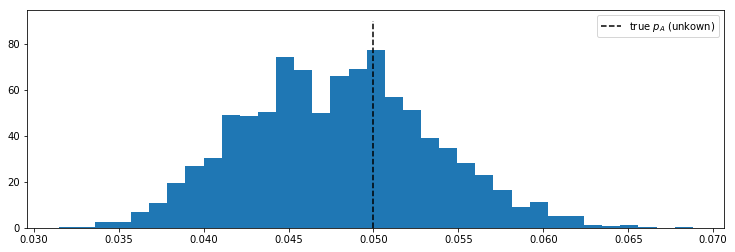

In [3]:
plt.vlines(p_true, 0, 90, linestyle="--", label = "true $p_A$ (unkown)")
plt.hist(mcmc.trace("p")[:], bins= 35, histtype="stepfilled", normed=True)
plt.legend()

Bも加える。

In [4]:
p_true_A = 0.05 # 本当ならこの値はわからない
p_true_B = 0.04 # 本当ならこの値はわからない
N_A = 1500
N_B = 750

observations_A = pm.rbernoulli(p_true_A, N_A)
observations_B = pm.rbernoulli(p_true_B, N_B)

# Paの値に革新が無いので[0, 1]の一様分布とする。
p_A = pm.Uniform('p_A', lower=0, upper=1)
p_B = pm.Uniform('p_B', lower=0, upper=1)
@pm.deterministic
def delta(p_A=p_A, p_B=p_B):
    return p_A - p_B

obs_A = pm.Bernoulli("obs_A", p_A, value=observations_A, observed=True)
obs_B = pm.Bernoulli("obs_B", p_B, value=observations_B, observed=True)

mcmc = pm.MCMC([p_A, p_B, delta, obs_A, obs_B])
mcmc.sample(25000, 5000)


 [-----------------100%-----------------] 25000 of 25000 complete in 2.4 sec

(0, 80)

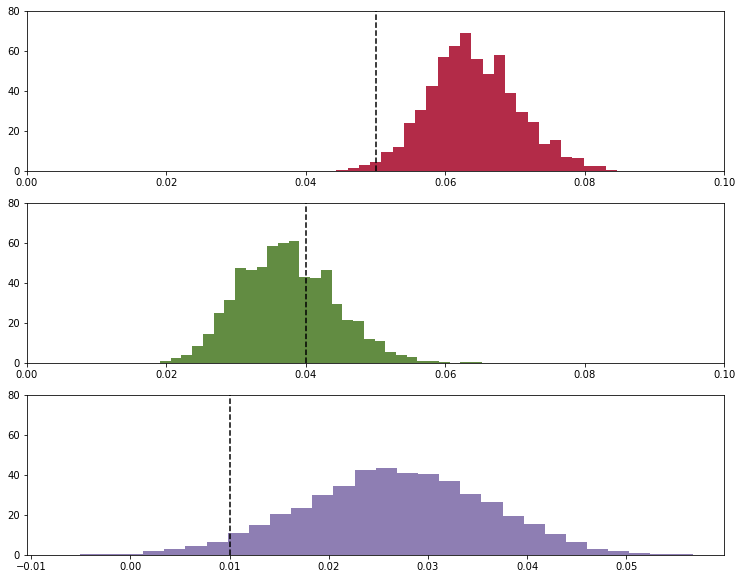

In [5]:
p_A_samples = mcmc.trace("p_A")[:]
p_B_samples = mcmc.trace("p_B")[:]
delta_samples = mcmc.trace("delta")[:]

figsize(12.5, 10)

ax = plt.subplot(311)
plt.hist(p_A_samples, histtype='stepfilled', bins=30, alpha=0.85, label="$p_A$", color="#A60628", normed=True)
plt.vlines(p_true_A, 0, 80, linestyle="--", label="true $p_A$ (unkown)")
plt.xlim(0, .1)
plt.ylim(0, 80)

ax = plt.subplot(312)
plt.hist(p_B_samples, histtype='stepfilled', bins=30, alpha=0.85, label="$p_B$", color="#467821", normed=True)
plt.vlines(p_true_B, 0, 80, linestyle="--", label="true $p_B$ (unkown)")
plt.xlim(0, .1)
plt.ylim(0, 80)

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85, label="$p_A - $p_B$", color="#7A68A6", normed=True)
plt.vlines(p_true_A - p_true_B, 0, 80, linestyle="--", label="true $p_A - p_B$ (unkown)")
plt.ylim(0, 80)


